In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing data set 2
df = pd.read_csv(r'dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,04-06-2010,Falcon 9,8191.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,22-05-2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,01-03-2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,29-09-2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,03-12-2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


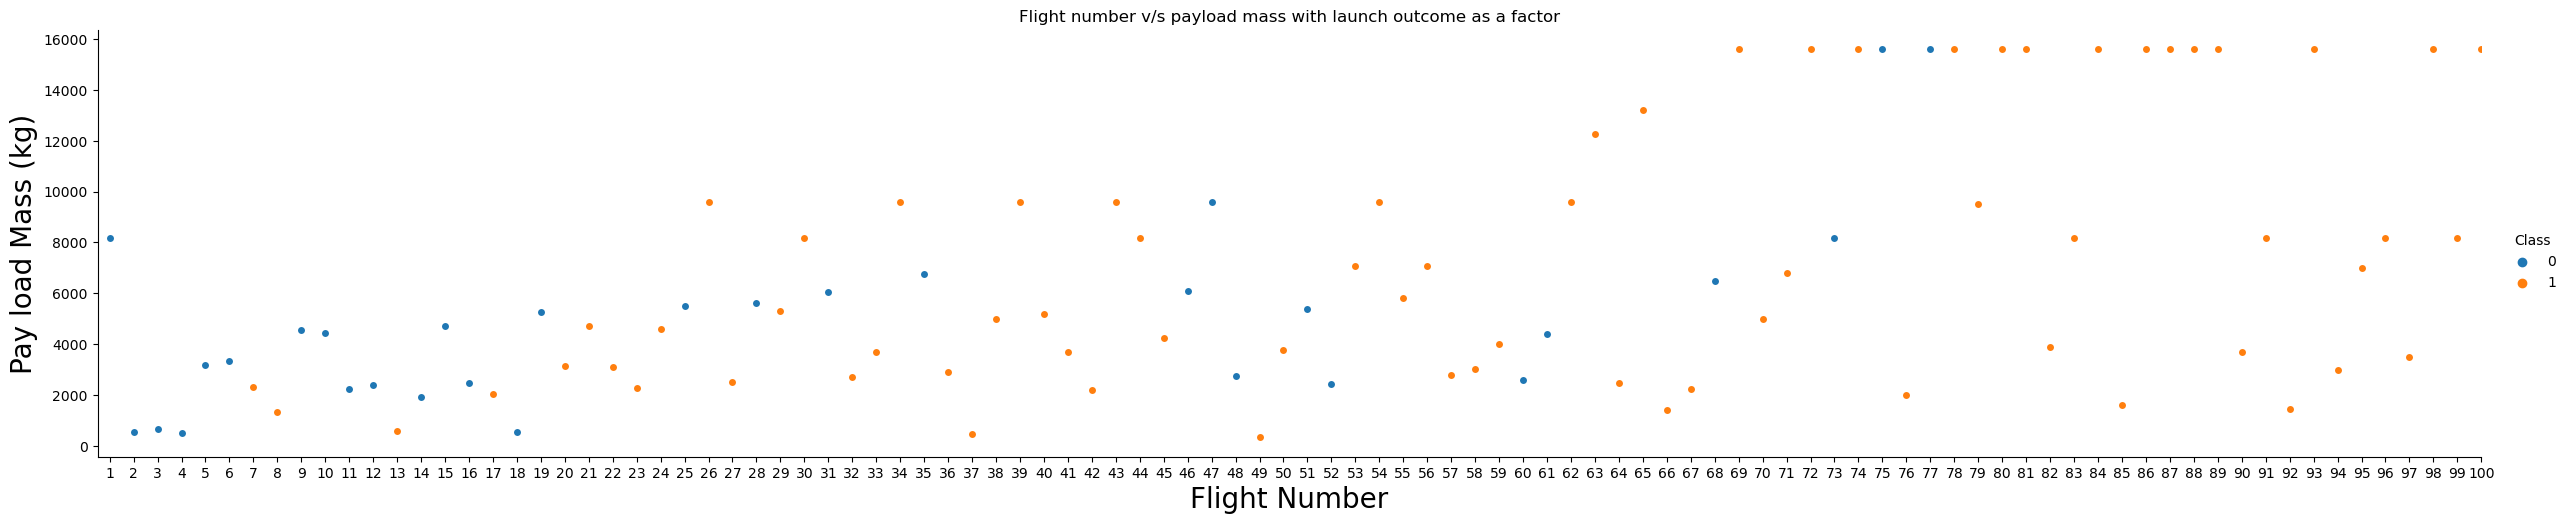

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.xlim(right = 99) # limiting to include 100 records
plt.title('Flight number v/s payload mass with launch outcome as a factor')
plt.show()

In [4]:
df.groupby('LaunchSite').mean(numeric_only = True)[['Class']]

,Class
LaunchSite,
CCSFS SLC 40,0.752688
KSC LC 39A,0.886364
Kwajalein Atoll,1.000000
VAFB SLC 4E,0.869565


Text(0.5, 1.0, 'Flight number v/s launch site with class as a factor')

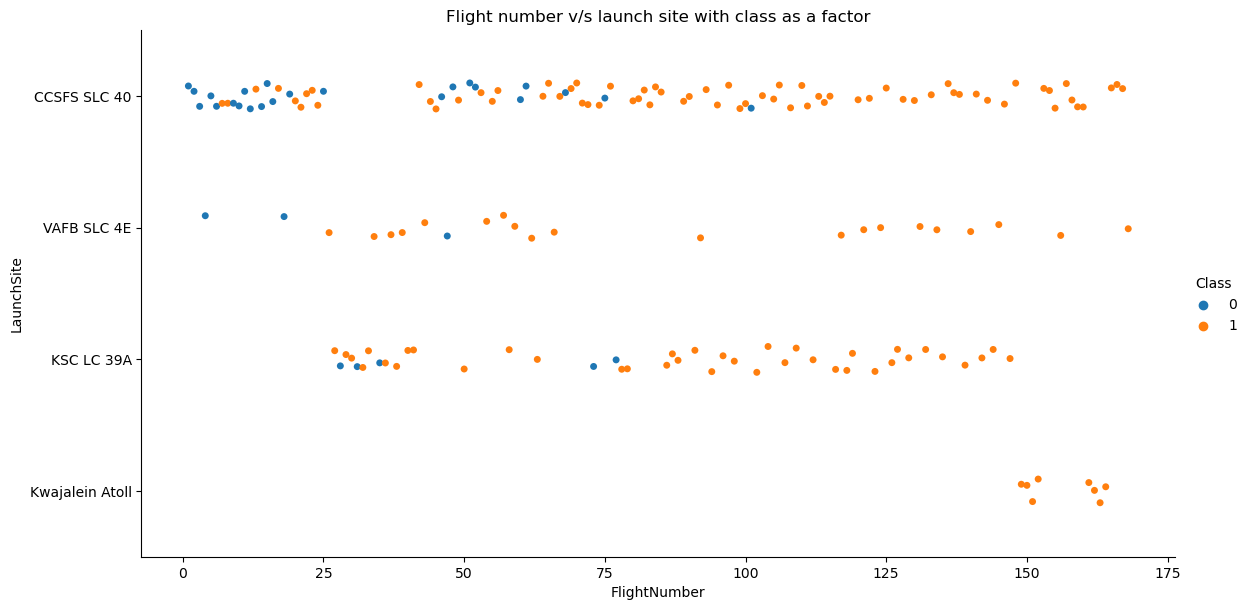

In [5]:
# flight number v/s launch site
sns.catplot(x = 'FlightNumber', y = 'LaunchSite',hue="Class", data = df, height = 6, aspect = 2)
plt.title('Flight number v/s launch site with class as a factor')

#### As the flight numbers increase, the chances of first stage landing successfully increases
#### Also only  the CCSFS SLC 40 launch site has landing failure with flight number greather than 100

<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

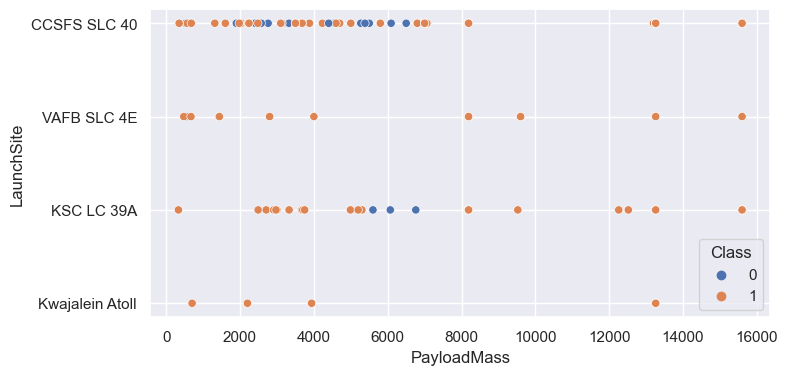

In [6]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(x ='PayloadMass', y = 'LaunchSite', data = df, hue = 'Class')


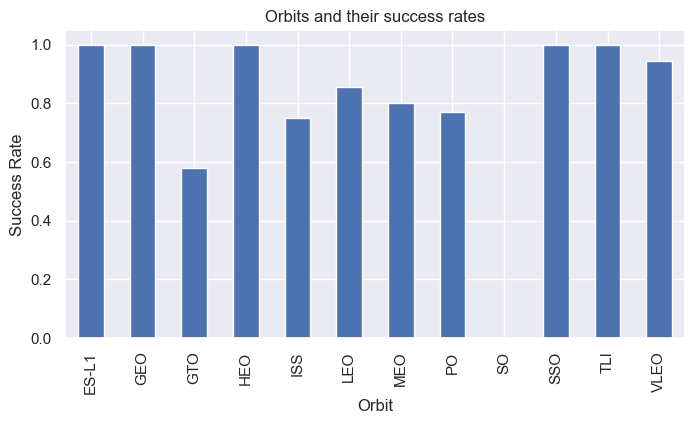

In [7]:
success_rate = df.groupby('Orbit')['Class'].mean()
success_rate.plot(kind = 'bar')
plt.ylabel('Success Rate')
plt.title('Orbits and their success rates')
plt.show()

#### Orbits ES-l1, GEO, HEO, SSO and TLI have highest success rates while SO has the lowest(0%)

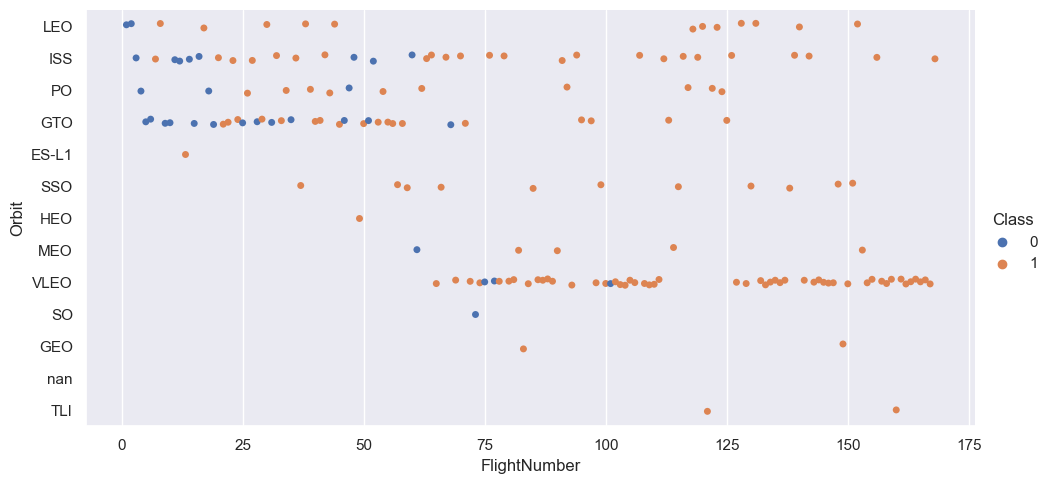

In [8]:
sns.catplot(x ='FlightNumber', y = 'Orbit', data = df, hue = 'Class', aspect = 2)

#### Significant correlation between number of flights and landing success in LEO orbit, weak correlation in GTO orbit

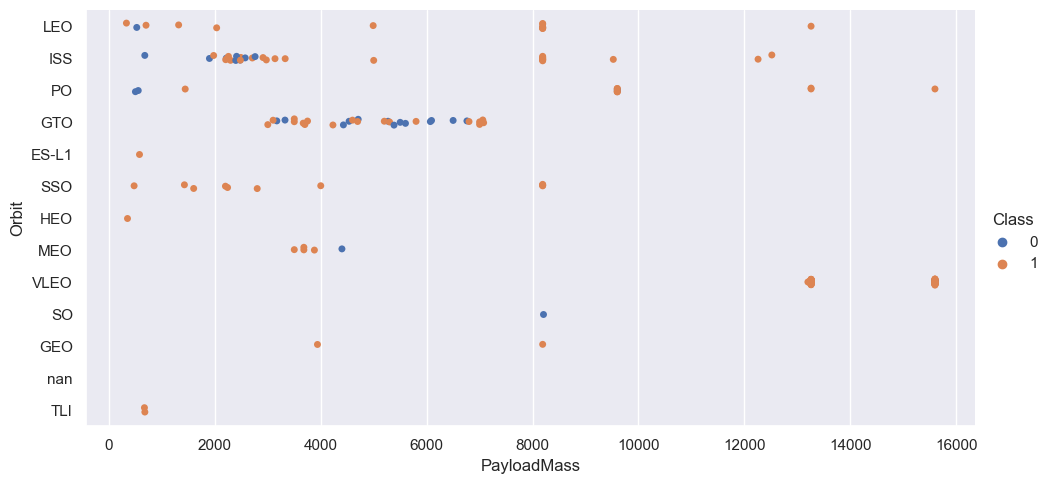

In [9]:
sns.catplot(x ='PayloadMass', y = 'Orbit', data = df, hue = 'Class', aspect = 2)

#### With heavy payloads the successful landing or positive landing rate are more for Polar(PO) , LEO and MEO
#### However for the orbit GTO payload mass does not seem to affect the landing outcome


C:\Users\shris\AppData\Local\Temp\ipykernel_17700\399551173.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], yearfirst = True, errors = 'ignore')


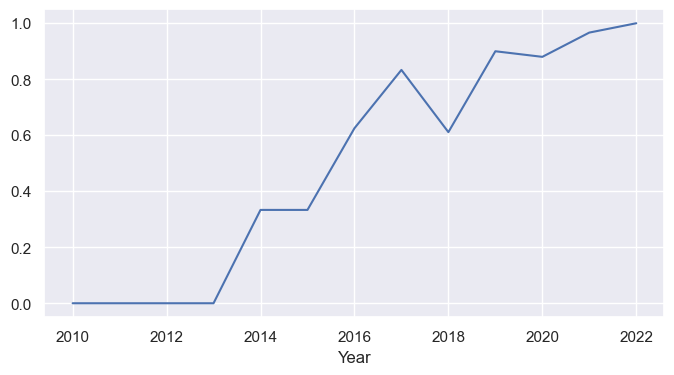

In [10]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst = True, errors = 'ignore')
df['Year'] = df['Date'].dt.year
year_rate = df.groupby('Year').mean(numeric_only = 'True')['Class']

year_rate.plot(kind = 'line')
plt.show()

#### It is clear that the sucess rate since 2013 kept increasing till 2022

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,8191.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004


In [12]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1,8191.0,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# converting boolean to integer
features_one_hot['GridFins'] = features_one_hot['GridFins'].astype(int)
features_one_hot['Legs'] = features_one_hot['Reused'].astype(int)
features_one_hot['Reused'] = features_one_hot['Legs'].astype(int)

In [14]:
# casting all columns to dtype float 
cols = features_one_hot.columns
features_one_hot[cols] = features_one_hot[cols].astype("float")
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1069    float64
Serial_B1071    float64
Serial_B1072    float64
Serial_B1073    float64
Serial_B1077    float64
Length: 92, dtype: object

In [16]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1.0,8191.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# saving the dataframe
features_one_hot.to_csv('dataset_part_3.csv', index=False)